# Phase_3 Project- Data Science
Name: Gladys Kemunto /
git hub repo: https://github.com/Mosota-Kemunto-Gladys-2020/Gladys_phase_3_project.git

# Overview

### Business Understanding

SyriaTel, a leading telecommunications company based in Syria, is experiencing significant financial losses due to customer churn. Customer churn refers to the rate at which customers discontinue their relationship with a company within a specific period, often due to various reasons. To mitigate this issue, SyriaTel aims to develop a predictive model that can accurately classify customers who are likely to churn. By effectively identifying these at-risk customers, the company can take proactive measures to retain them, ultimately increasing profits and reducing the negative impact of churn on the business.

**Step 1: Data Understanding**

1.1. Load the Dataset

First, we'll load the dataset and examine its structure.

In [290]:
import os

# Change the working directory
os.chdir(r"C:\Users\Augustine Wanyonyi\Desktop\Phase_3_Project_2024")


# Verify the change
print("Current working directory:", os.getcwd())


Current working directory: C:\Users\Augustine Wanyonyi\Desktop\Phase_3_Project_2024


In [251]:
import pandas as pd

# Load the dataset
df = pd.read_csv('SyriaTel_Customer_Churn.csv')

# Display the first few rows of the dataset
print("\nFirst Few Rows of the Dataset:")
df.head()



First Few Rows of the Dataset:


state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [252]:
# Display basic information about the dataset
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       33

In [253]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())



Missing Values in Each Column:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


**Step 2: Data Cleaning**

Now that we understand the structure of the data, we'll clean it by addressing any issues such as missing values or irrelevant columns.

2.1. Drop Irrelevant Columns

Remove columns that are not useful for prediction, such as identifiers like the phone number. Dropping irrelevant columns,  helps clean the dataset by removing features that do not contribute to the predictive model. This step ensures that the model is only trained on relevant information.

In [254]:
df = df.drop(columns=['phone number'])


2.2 Checking for Missing Values
Identify any missing values within the dataset.

Ensuring there are no missing values is crucial, as missing data can lead to inaccuracies in the model training process. If missing values are found, they need to be addressed appropriately.

In [255]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


**Step 3: Exploratory Data Analysis (EDA)**

3.1. Descriptive Statistics

Let's look at the basic statistics of the numerical features.

In [256]:
print("Descriptive Statistics of Numerical Features:")

df.describe()


Descriptive Statistics of Numerical Features:


account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

3.2. Distribution of the Target Variable (churn)

We'll visualize the distribution of the churn variable to understand the class balance.If there is a significant imbalance, techniques like SMOTE may be necessary to ensure the model is not biased.

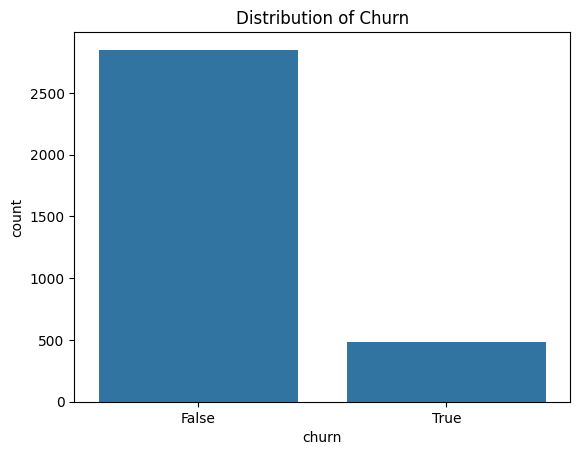

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='churn', data=df)
plt.title('Distribution of Churn')
plt.show()


3.3. Visualize the Distribution of Numerical Features

Let's plot histograms to visualize the distribution of the numerical features.

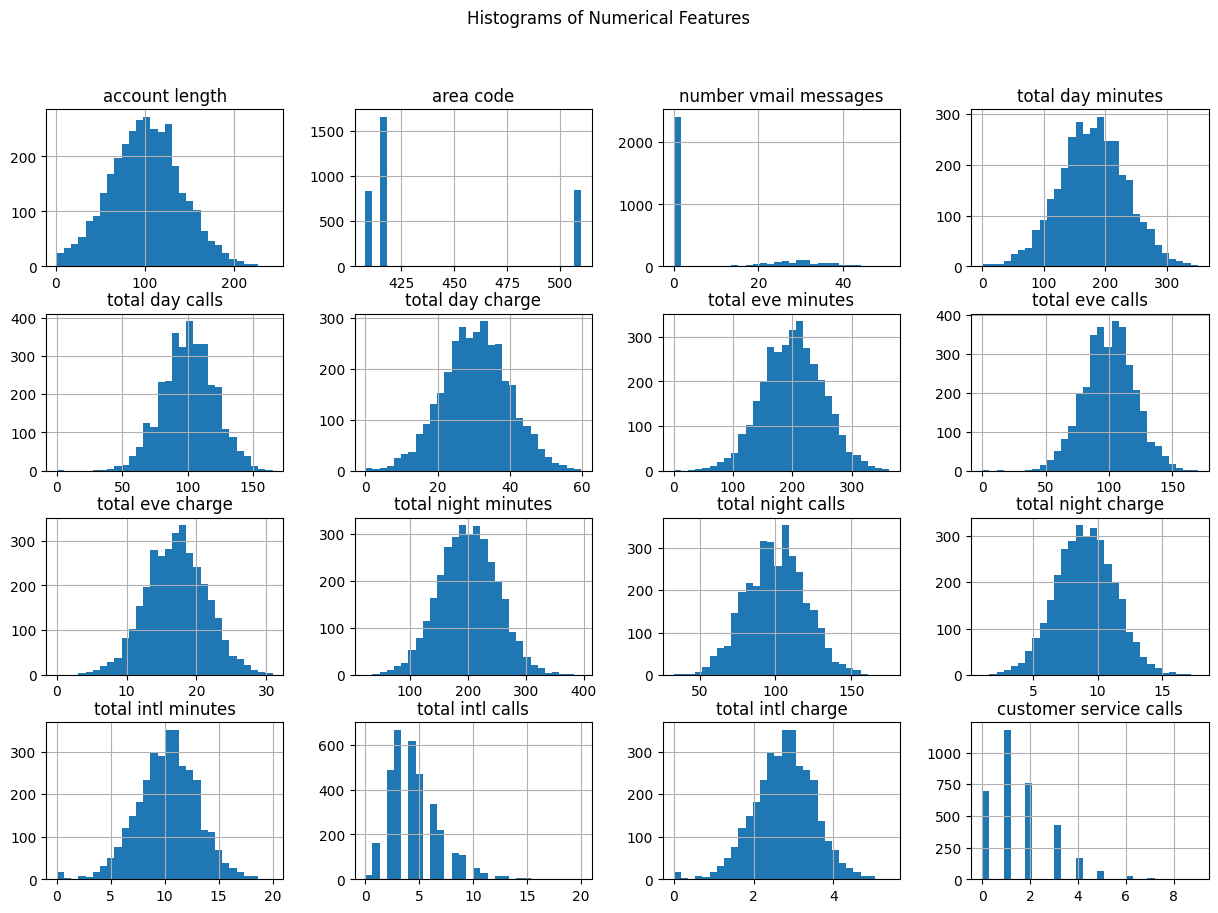

In [258]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()


3.4. Correlation Analysis

We'll calculate and visualize the correlation matrix for the numerical features.

In [259]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure all features are numeric
X = df.select_dtypes(include=[np.number])  # Only select numeric columns

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)



                   feature           VIF
0           account length  7.293103e+00
1                area code  6.102501e+01
2    number vmail messages  1.351056e+00
3        total day minutes  1.246034e+08
4          total day calls  2.361747e+01
5         total day charge  1.246078e+08
6        total eve minutes  3.741752e+07
7          total eve calls  2.375305e+01
8         total eve charge  3.741886e+07
9      total night minutes  1.071952e+07
10       total night calls  2.460108e+01
11      total night charge  1.071916e+07
12      total intl minutes  9.975354e+05
13        total intl calls  4.273501e+00
14       total intl charge  9.979114e+05
15  customer service calls  2.402765e+00


Addressing Multicollinearity:

Given the very high VIF values, it is important to address the multicollinearity issue before proceeding with modeling:

Remove One of the Correlated Pairs:

Since total day minutes and total day charge are almost perfectly correlated, you should remove one of them (preferably total day charge if you're focusing on minutes).
Similarly, do the same for total eve minutes/total eve charge, total night minutes/total night charge, and total intl minutes/total intl charge.

Check the Area Code:

Depending on your understanding of how area code interacts with other features, consider whether it is essential for your model. If not, you might consider removing it or further investigating its relationship with other features.
Recalculate VIF:

After removing these highly correlated features, recalculate the VIFs to ensure that multicollinearity has been reduced.

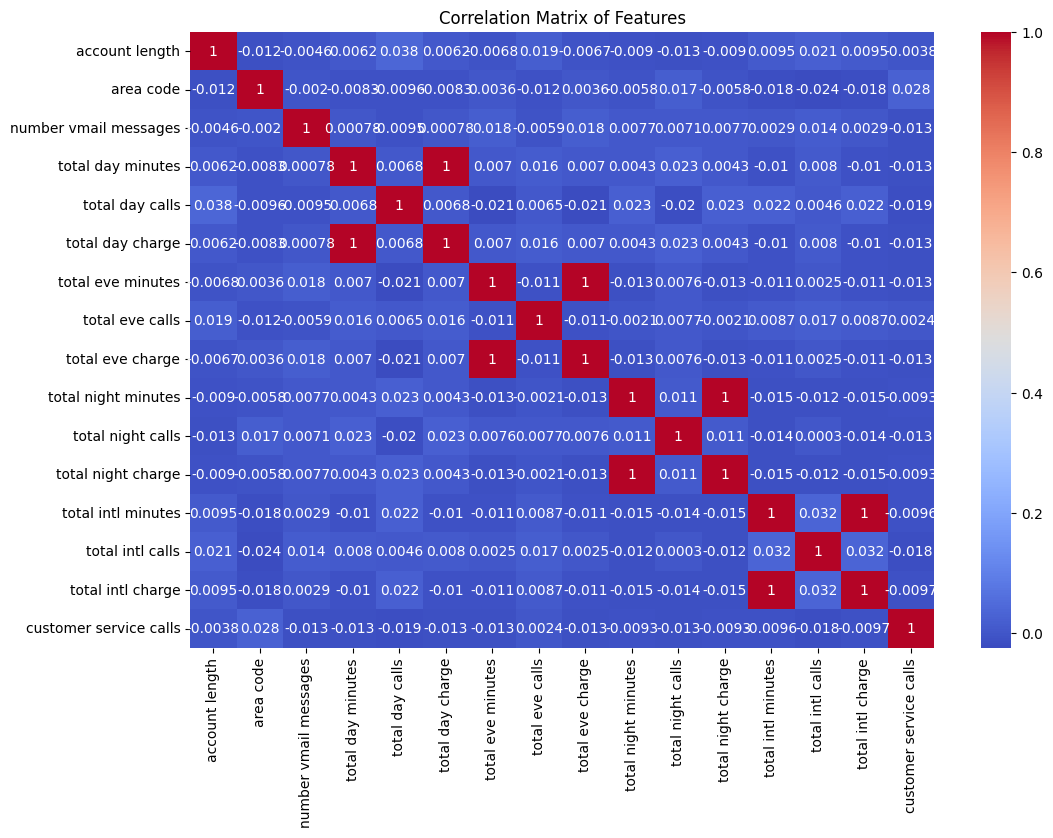

In [260]:
import numpy as np

# Select only the numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


Addressing Multicollinearity:

Given the very high VIF values, it is important to address the multicollinearity issue before proceeding with modeling:

Remove One of the Correlated Pairs:

Since total day minutes and total day charge are almost perfectly correlated, you should remove one of them (preferably total day charge if you're focusing on minutes).
Similarly, do the same for total eve minutes/total eve charge, total night minutes/total night charge, and total intl minutes/total intl charge.

Check the Area Code:

Depending on your understanding of how area code interacts with other features, consider whether it is essential for your model. If not, you might consider removing it or further investigating its relationship with other features.
Recalculate VIF:

After removing these highly correlated features, recalculate the VIFs to ensure that multicollinearity has been reduced.

In [261]:
print(df.columns)


Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')


Next Steps:
Remove Highly Correlated Features:

In [262]:
features_to_remove = [
    'total day charge', 'total eve charge', 
    'total night charge', 'total intl charge'
]
df = df.drop(columns=features_to_remove)
df.shape


(3333, 16)

In [263]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure all features are numeric
X = df.select_dtypes(include=[np.number])  # Only select numeric columns

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                   feature        VIF
0           account length   7.290485
1                area code  60.934313
2    number vmail messages   1.349878
3        total day minutes  11.448382
4          total day calls  23.585228
5        total eve minutes  15.600537
6          total eve calls  23.723844
7      total night minutes  15.730926
8        total night calls  24.596981
9       total intl minutes  13.643320
10        total intl calls   4.269890
11  customer service calls   2.402062


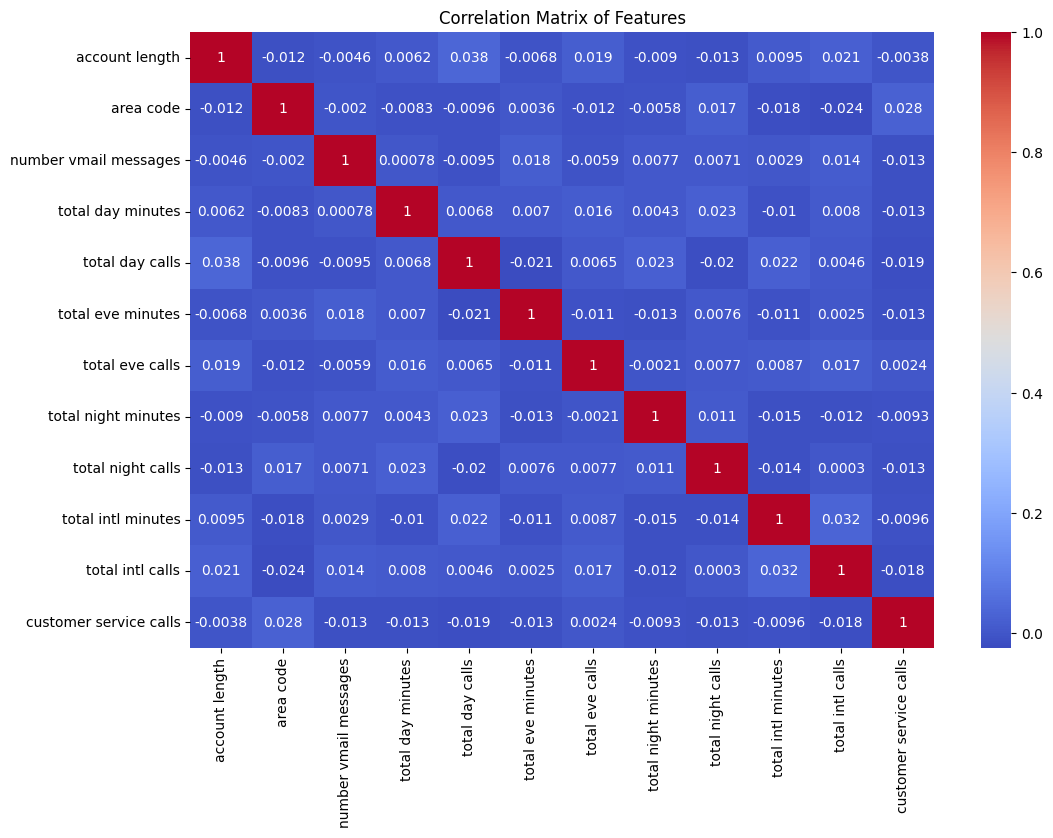

In [264]:
import numpy as np

# Select only the numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

3.5. Box Plots for Outliers

We can use box plots to identify potential outliers in the numerical features.

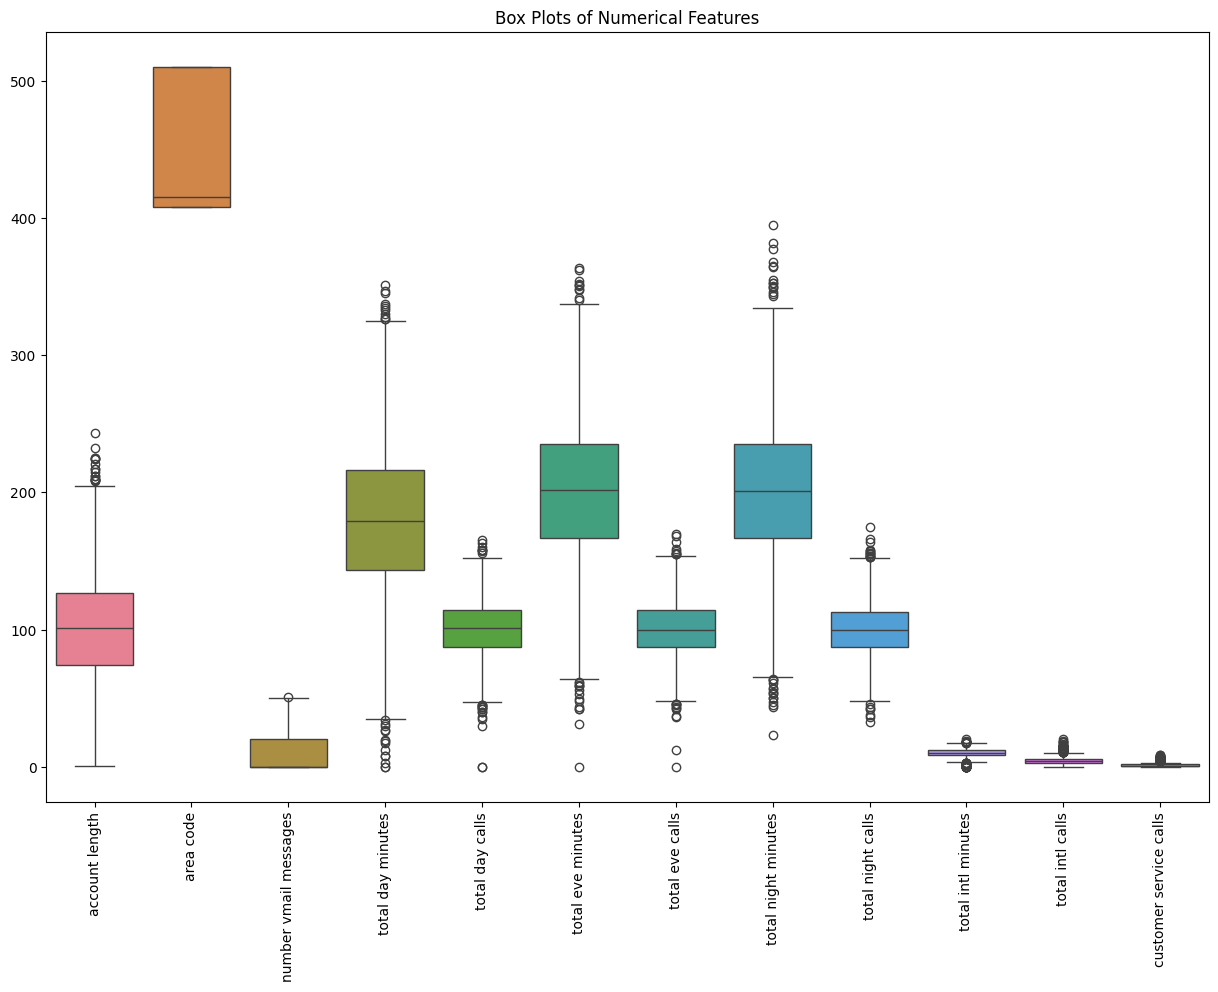

In [265]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_df)
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=90)
plt.show()


3.6. Pair Plot to Explore Relationships

A pair plot will help us explore relationships between pairs of features, colored by the churn variable.

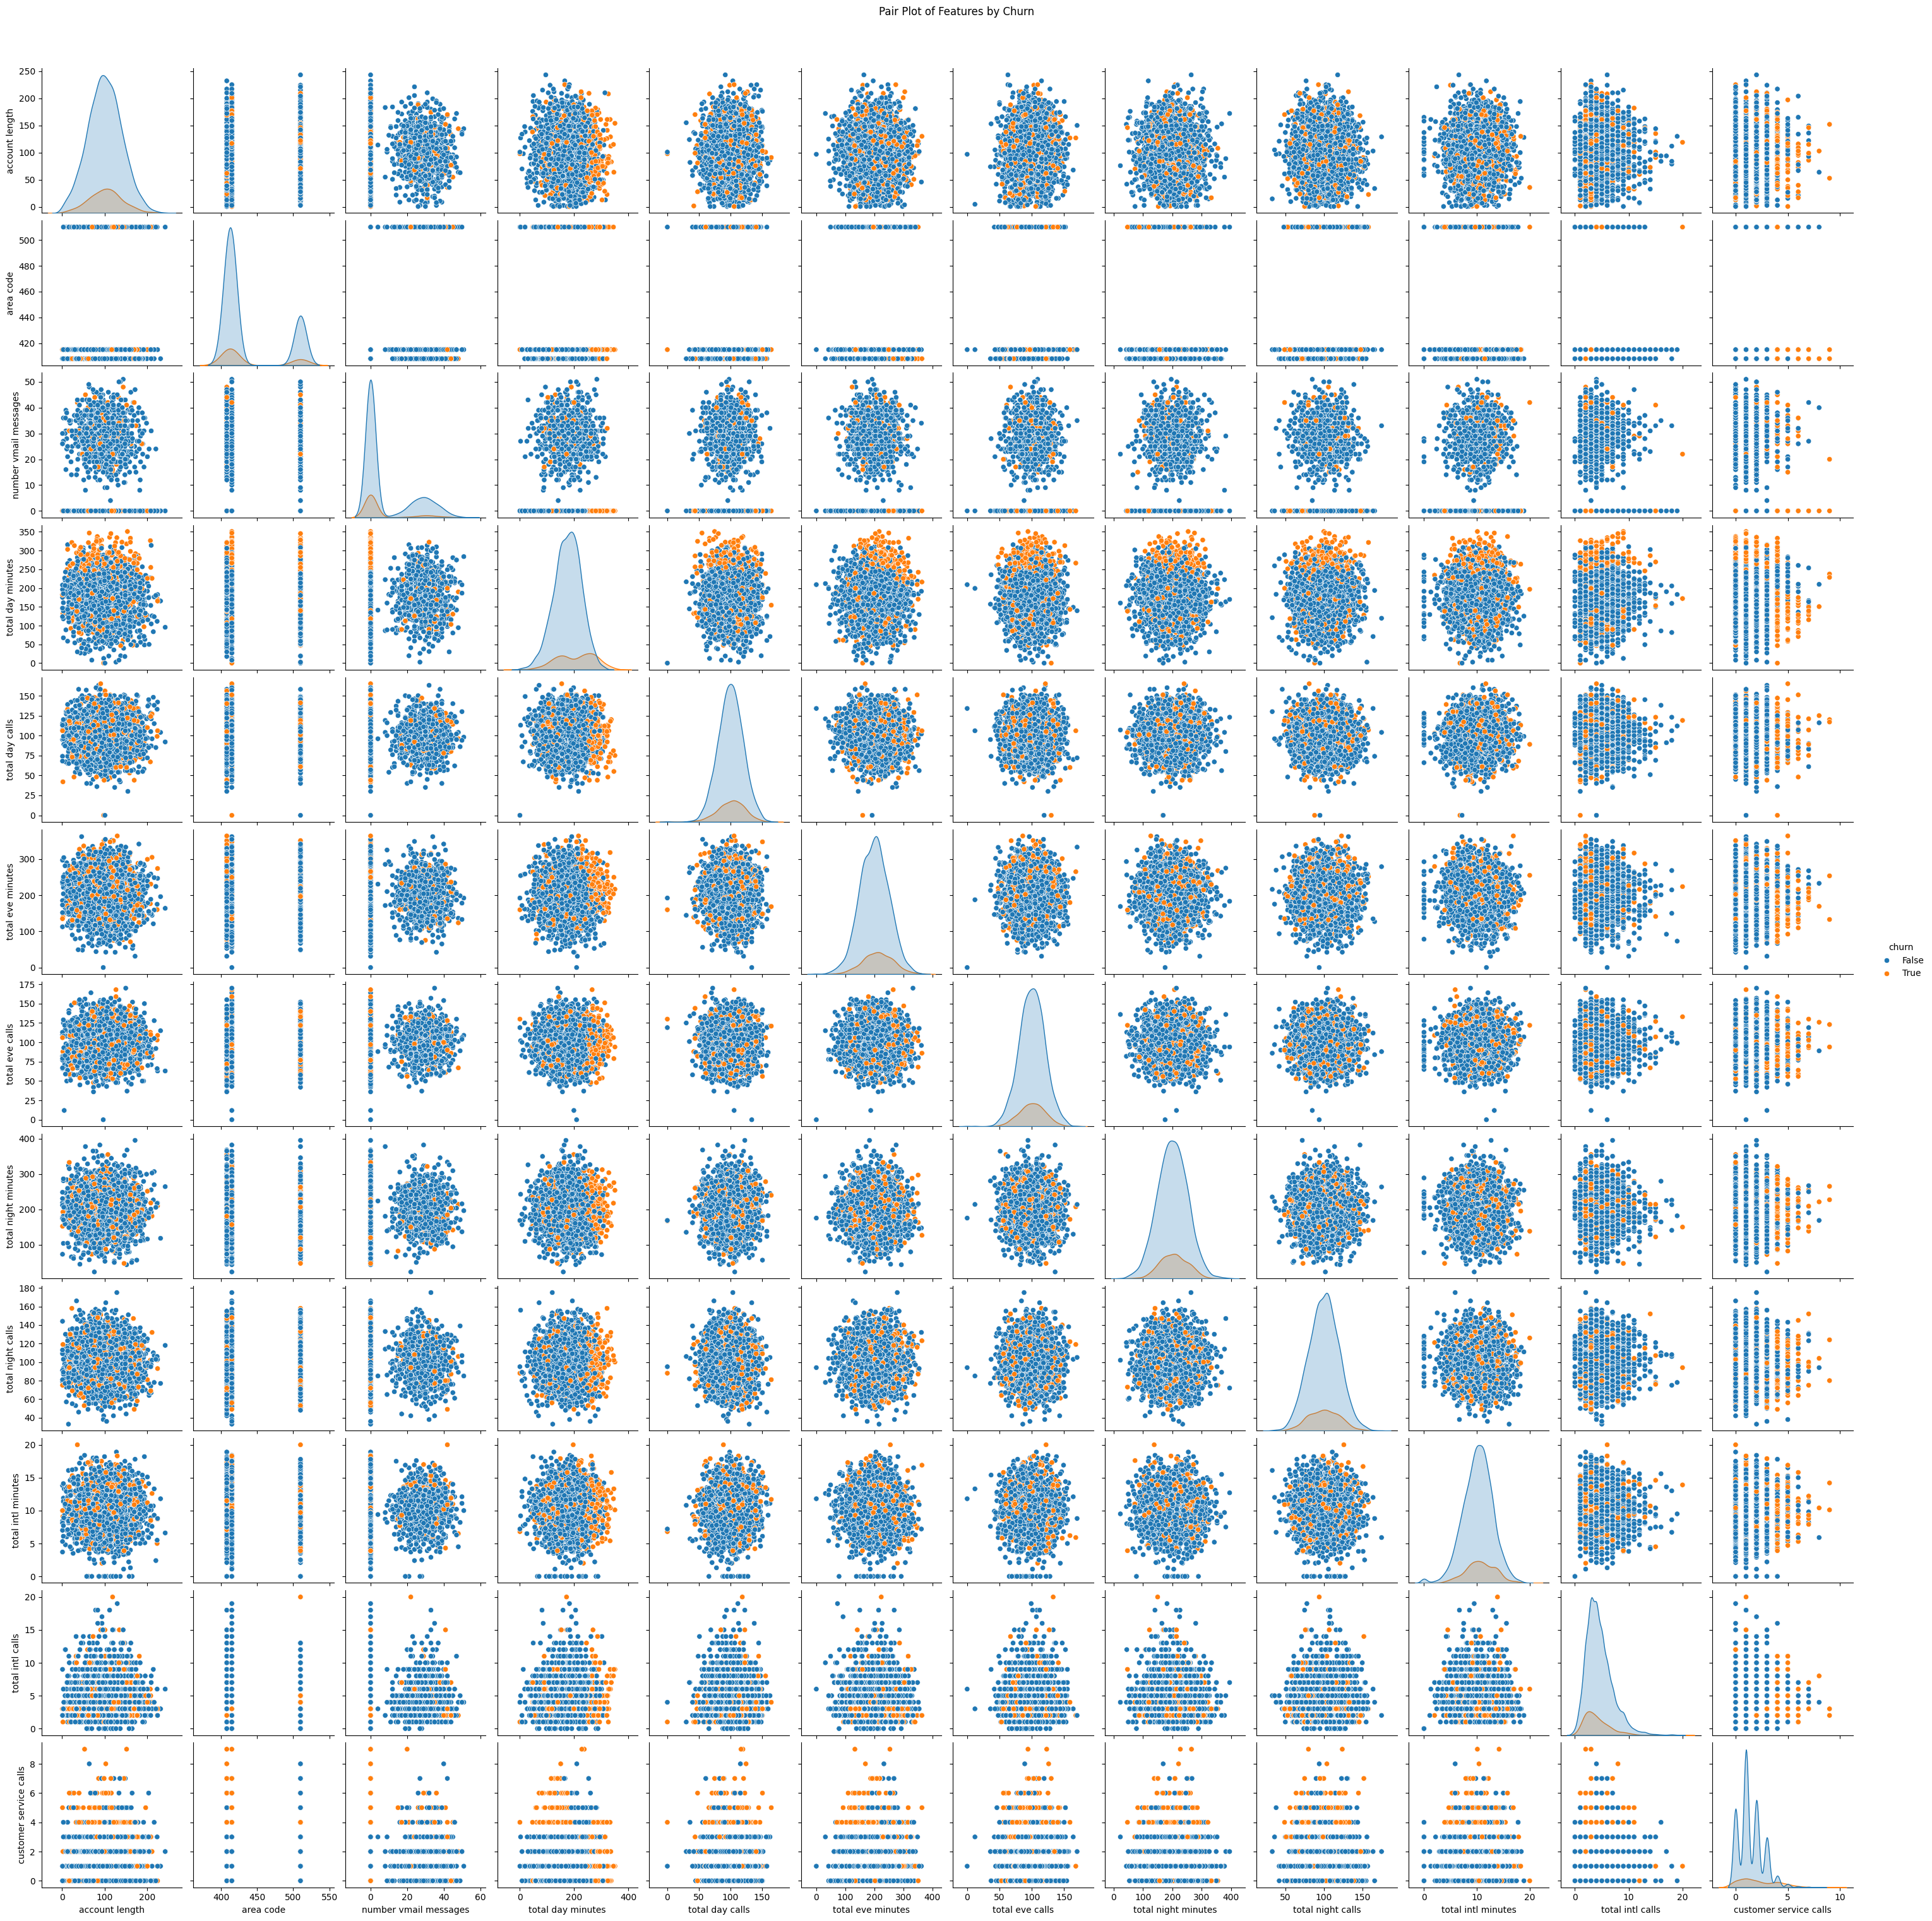

In [266]:
sns.pairplot(df, hue='churn', diag_kind='kde')
plt.suptitle('Pair Plot of Features by Churn', y=1.02)
plt.show()


3.7. Categorical Features Analysis

We will analyze categorical features using count plots to see how they relate to churn.

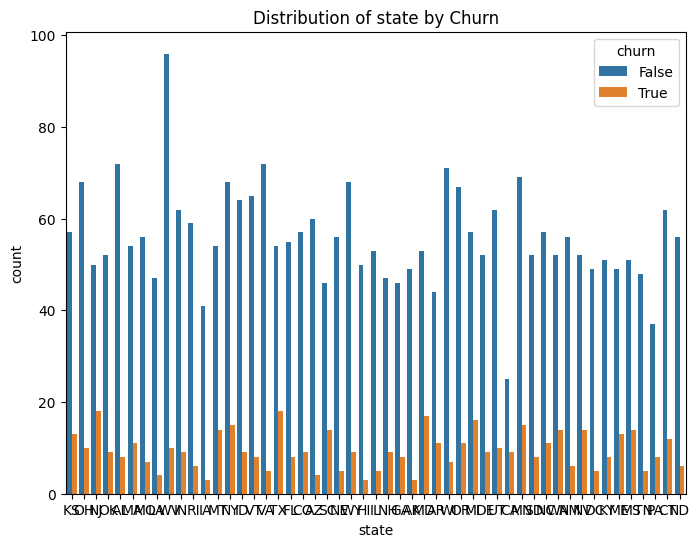

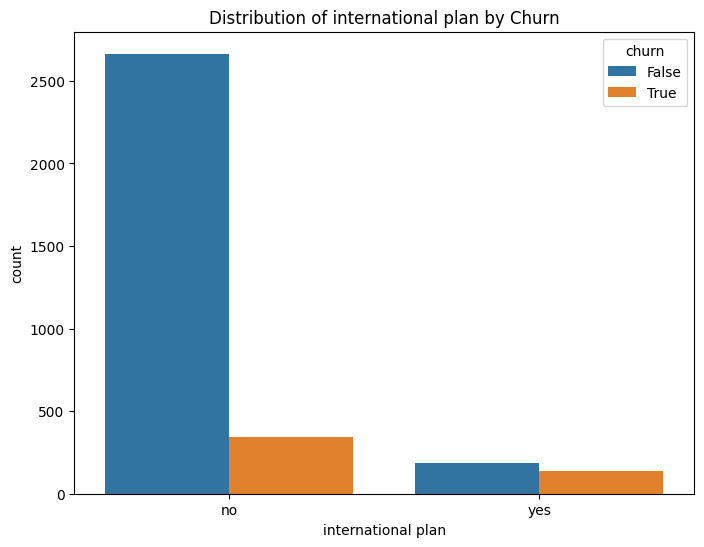

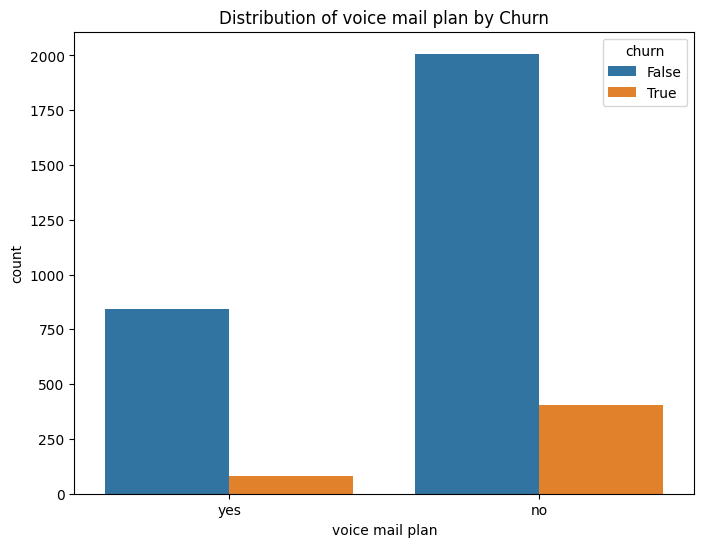

In [267]:
categorical_features = ['state', 'international plan', 'voice mail plan']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='churn', data=df)
    plt.title(f'Distribution of {feature} by Churn')
    plt.show()


**Step 4: Preprocessing**

4.1. Encoding Categorical Variables

We'll need to convert categorical variables into a format suitable for modeling.

In [274]:
df.shape

(3333, 16)

In [275]:
df_encoded.shape

(3333, 65)

In [272]:

# Perform one-hot encoding on categorical variables
df_encoded = pd.get_dummies(df, columns=['state', 'international plan', 'voice mail plan'], drop_first=True)
df_encoded.head()



account length  area code  number vmail messages  total day minutes  \
0             128        415                     25              265.1   
1             107        415                     26              161.6   
2             137        415                      0              243.4   
3              84        408                      0              299.4   
4              75        415                      0              166.7   

   total day calls  total eve minutes  total eve calls  total night minutes  \
0              110              197.4               99                244.7   
1              123              195.5              103                254.4   
2              114              121.2              110                162.6   
3               71               61.9               88                196.9   
4              113              148.3              122                186.9   

   total night calls  total intl minutes  ...  state_TX  state_UT  state_VA  \
0                 91                10.0  ...     False     False     False   
1                103                13.7  ...     False     False     False   
2                104                12.2  ...     False     False     False   
3                 89                 6.6  ...     False     False     False   
4                121                10.1  ...     False     False     False   

   state_VT  state_WA  state_WI  state_WV  state_WY  international plan_yes  \
0     False     False     False     False     False                   False   
1     False     False     False     False     False                   False   
2     False     False     False     False     False                   False   
3     False     False     False     False     False                    True   
4     False     False     False     False     False                    True   

   voice mail plan_yes  
0                 True  
1                 True  
2                False  
3                False  
4                False  

[5 rows x 65 columns]

In [276]:
# Check for the  datatype to ensure all columns are numeric
print("\nData Types After Encoding:")
print(df_encoded.dtypes)



Data Types After Encoding:
account length              int64
area code                   int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
                           ...   
state_WI                     bool
state_WV                     bool
state_WY                     bool
international plan_yes       bool
voice mail plan_yes          bool
Length: 65, dtype: object


Step 3.3: Convert Boolean Data Types to Numeric
You can easily convert all bool columns to integers using .astype(int). This will convert True to 1 and False to 0.

In [277]:
# Convert all boolean columns to integers (0 and 1)
df = df_encoded.astype(int)

# Verify the data types again to ensure all columns are now numeric
print("\nData Types After Converting Booleans to Integers:")
print(df_encoded.dtypes)



Data Types After Converting Booleans to Integers:
account length              int64
area code                   int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
                           ...   
state_WI                     bool
state_WV                     bool
state_WY                     bool
international plan_yes       bool
voice mail plan_yes          bool
Length: 65, dtype: object


In [278]:
# Display the column names to verify
print(df_encoded.columns)


Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total eve minutes',
       'total eve calls', 'total night minutes', 'total night calls',
       'total intl minutes', 'total intl calls', 'customer service calls',
       'churn', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO',
       'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI',
       'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY',
       'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN',
       'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE',
       'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH',
       'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD',
       'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA',
       'state_WI', 'state_WV', 'state_WY', 'international plan_yes',
       'voice mail plan_ye

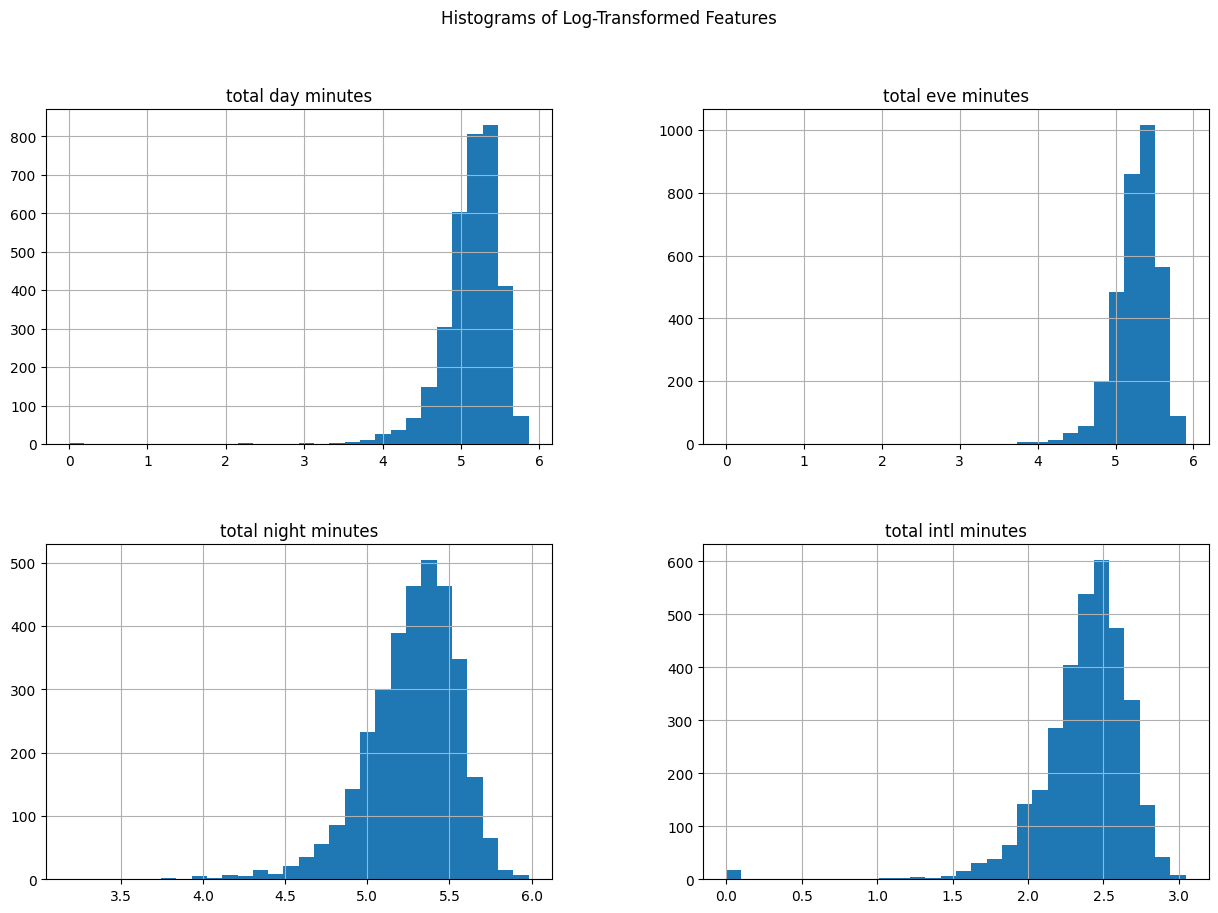

In [282]:
import numpy as np

# Identify skewed features
skewed_features = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']

# Apply log transformation
for feature in skewed_features:
    df_encoded[feature] = np.log1p(df_encoded[feature])

# Verify the transformation
df_encoded[skewed_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Log-Transformed Features')
plt.show()


4.2. Feature Scaling

Scaling is important for models that are sensitive to the scale of the data (e.g., Logistic Regression, KNN).

In [284]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = numeric_df.columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df

# Save the transformed DataFrame to a CSV file
df.to_csv('transformed_data.csv', index=False)

df



account length  area code  number vmail messages  total day minutes  \
0           0.676489  -0.523603               1.234883           1.159784   
1           0.149065  -0.523603               1.307948          -0.127532   
2           0.902529  -0.523603              -0.591760           0.935684   
3          -0.428590  -0.688834              -0.591760           1.472038   
4          -0.654629  -0.523603              -0.591760          -0.048623   
...              ...        ...                    ...                ...   
3328        2.283878  -0.523603               2.038605          -0.208916   
3329       -0.830437  -0.523603              -0.591760           0.804769   
3330       -1.835055   1.718817              -0.591760           0.160357   
3331        2.082955   1.718817              -0.591760           0.595119   
3332       -0.679745  -0.523603               1.234883           0.838122   

      total day calls  total eve minutes  total eve calls  \
0            0.476643           0.065236        -0.055940   
1            1.124503           0.030564         0.144867   
2            0.675985          -1.588533         0.496279   
3           -1.466936          -3.900197        -0.608159   
4            0.626149          -0.905760         1.098699   
...               ...                ...              ...   
3328        -1.167924           0.362392         1.299506   
3329        -2.164631          -0.793039        -2.264816   
3330         0.426808           1.356705        -2.114211   
3331         0.227466          -0.662508        -0.808966   
3332         0.626149           1.073486        -0.909370   

      total night minutes  total night calls  total intl minutes  ...  \
0                0.831017          -0.465494            0.190498  ...   
1                0.974743           0.147825            0.929409  ...   
2               -0.633020           0.198935            0.702345  ...   
3                0.047622          -0.567714           -1.194366  ...   
4               -0.139538           1.067803            0.190498  ...   
...                   ...                ...                 ...  ...   
3328             1.310750          -0.874374           -0.101528  ...   
3329            -0.044739           1.170023           -0.101528  ...   
3330            -0.044739          -0.465494            1.140800  ...   
3331            -1.179491           1.885562           -1.666677  ...   
3332             0.786754          -1.181033            0.929409  ...   

      state_TX  state_UT  state_VA  state_VT  state_WA  state_WI  state_WV  \
0            0         0         0         0         0         0         0   
1            0         0         0         0         0         0         0   
2            0         0         0         0         0         0         0   
3            0         0         0         0         0         0         0   
4            0         0         0         0         0         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
3328         0         0         0         0         0         0         0   
3329         0         0         0         0         0         0         1   
3330         0         0         0         0         0         0         0   
3331         0         0         0         0         0         0         0   
3332         0         0         0         0         0         0         0   

      state_WY  international plan_yes  voice mail plan_yes  
0            0                       0                    1  
1            0                       0                    1  
2            0                       0                    0  
3            0                       1                    0  
4            0                       1                    0  
...        ...                     ...                  ...  
3328         0                       0                    1  
3329         0                       0

4.3. Train-Test Split

We split the dataset into training and testing sets.

In [289]:
df

account length  area code  number vmail messages  total day minutes  \
0           0.676489  -0.523603               1.234883           1.159784   
1           0.149065  -0.523603               1.307948          -0.127532   
2           0.902529  -0.523603              -0.591760           0.935684   
3          -0.428590  -0.688834              -0.591760           1.472038   
4          -0.654629  -0.523603              -0.591760          -0.048623   
...              ...        ...                    ...                ...   
3328        2.283878  -0.523603               2.038605          -0.208916   
3329       -0.830437  -0.523603              -0.591760           0.804769   
3330       -1.835055   1.718817              -0.591760           0.160357   
3331        2.082955   1.718817              -0.591760           0.595119   
3332       -0.679745  -0.523603               1.234883           0.838122   

      total day calls  total eve minutes  total eve calls  \
0            0.476643           0.065236        -0.055940   
1            1.124503           0.030564         0.144867   
2            0.675985          -1.588533         0.496279   
3           -1.466936          -3.900197        -0.608159   
4            0.626149          -0.905760         1.098699   
...               ...                ...              ...   
3328        -1.167924           0.362392         1.299506   
3329        -2.164631          -0.793039        -2.264816   
3330         0.426808           1.356705        -2.114211   
3331         0.227466          -0.662508        -0.808966   
3332         0.626149           1.073486        -0.909370   

      total night minutes  total night calls  total intl minutes  ...  \
0                0.831017          -0.465494            0.190498  ...   
1                0.974743           0.147825            0.929409  ...   
2               -0.633020           0.198935            0.702345  ...   
3                0.047622          -0.567714           -1.194366  ...   
4               -0.139538           1.067803            0.190498  ...   
...                   ...                ...                 ...  ...   
3328             1.310750          -0.874374           -0.101528  ...   
3329            -0.044739           1.170023           -0.101528  ...   
3330            -0.044739          -0.465494            1.140800  ...   
3331            -1.179491           1.885562           -1.666677  ...   
3332             0.786754          -1.181033            0.929409  ...   

      state_TX  state_UT  state_VA  state_VT  state_WA  state_WI  state_WV  \
0            0         0         0         0         0         0         0   
1            0         0         0         0         0         0         0   
2            0         0         0         0         0         0         0   
3            0         0         0         0         0         0         0   
4            0         0         0         0         0         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
3328         0         0         0         0         0         0         0   
3329         0         0         0         0         0         0         1   
3330         0         0         0         0         0         0         0   
3331         0         0         0         0         0         0         0   
3332         0         0         0         0         0         0         0   

      state_WY  international plan_yes  voice mail plan_yes  
0            0                       0                    1  
1            0                       0                    1  
2            0                       0                    0  
3            0                       1                    0  
4            0                       1                    0  
...        ...                     ...                  ...  
3328         0                       0                    1  
3329         0                       0

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['churn'])
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


**Step 5: Handling Class Imbalance**

5.1. Apply SMOTE
If the churn class is imbalanced, we can use SMOTE to balance the training data.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


**Step 6: Modeling**

We will build and evaluate different models: Logistic Regression, Decision Trees, K-Nearest Neighbors (KNN), and Random Forest.

6.1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_smote, y_train_smote)
log_reg_pred = log_reg.predict(X_test)
log_reg_proba = log_reg.predict_proba(X_test)[:, 1]

print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_reg_pred))
print(f"Accuracy: {accuracy_score(y_test, log_reg_pred)}")
print(f"AUC: {roc_auc_score(y_test, log_reg_proba)}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       570
           1       0.44      0.39      0.42        97

    accuracy                           0.84       667
   macro avg       0.67      0.65      0.66       667
weighted avg       0.83      0.84      0.84       667

Accuracy: 0.8395802098950524
AUC: 0.7671188279978296


6.2. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_smote, y_train_smote)
dt_clf_pred = dt_clf.predict(X_test)
dt_clf_proba = dt_clf.predict_proba(X_test)[:, 1]

print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_clf_pred))
print(f"Accuracy: {accuracy_score(y_test, dt_clf_pred)}")
print(f"AUC: {roc_auc_score(y_test, dt_clf_proba)}")


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.92       570
           1       0.53      0.75      0.62        97

    accuracy                           0.87       667
   macro avg       0.74      0.82      0.77       667
weighted avg       0.89      0.87      0.87       667

Accuracy: 0.8650674662668666
AUC: 0.8183939229517092


6.3. K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_smote, y_train_smote)
knn_clf_pred = knn_clf.predict(X_test)
knn_clf_proba = knn_clf.predict_proba(X_test)[:, 1]

print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, knn_clf_pred))
print(f"Accuracy: {accuracy_score(y_test, knn_clf_pred)}")
print(f"AUC: {roc_auc_score(y_test, knn_clf_proba)}")


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.56      0.70       570
           1       0.23      0.75      0.35        97

    accuracy                           0.59       667
   macro avg       0.58      0.66      0.52       667
weighted avg       0.83      0.59      0.65       667

Accuracy: 0.5892053973013494
AUC: 0.7016458672454331


6.4. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_smote, y_train_smote)
rf_clf_pred = rf_clf.predict(X_test)
rf_clf_proba = rf_clf.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_clf_pred))
print(f"Accuracy: {accuracy_score(y_test, rf_clf_pred)}")
print(f"AUC: {roc_auc_score(y_test, rf_clf_proba)}")


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       570
           1       0.64      0.58      0.61        97

    accuracy                           0.89       667
   macro avg       0.78      0.76      0.77       667
weighted avg       0.89      0.89      0.89       667

Accuracy: 0.8905547226386806
AUC: 0.8664858021342016


**Step 7: Model Evaluation**

7.1. Confusion Matrix

We'll plot the confusion matrix for each model to visualize performance.

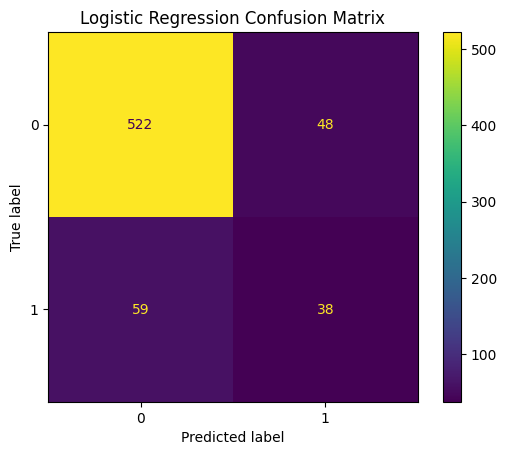

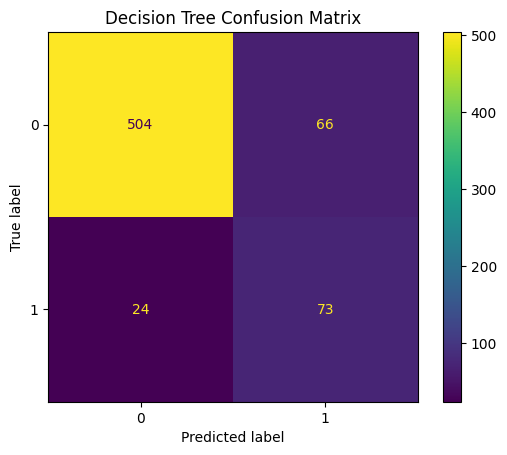

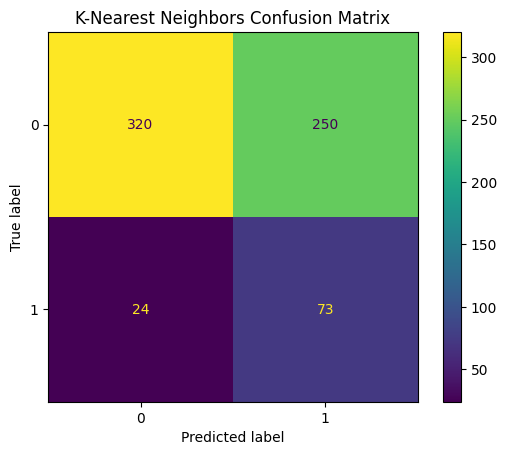

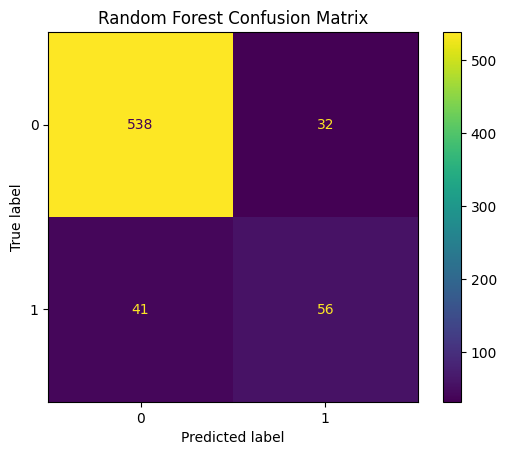

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Logistic Regression Confusion Matrix
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Decision Tree Confusion Matrix
ConfusionMatrixDisplay.from_estimator(dt_clf, X_test, y_test)
plt.title('Decision Tree Confusion Matrix')
plt.show()

# KNN Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn_clf, X_test, y_test)
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.show()

# Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test)
plt.title('Random Forest Confusion Matrix')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# Define the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Train models and collect the results
results = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_smote, y_train_smote)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extract precision, recall, and f1-score for the positive class (churn=1)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']
    
    # Append the results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC": auc
    })

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score       AUC
0  Logistic Regression  0.839580   0.441860  0.391753  0.415301  0.767119
1        Decision Tree  0.865067   0.525180  0.752577  0.618644  0.818394
2  K-Nearest Neighbors  0.589205   0.226006  0.752577  0.347619  0.701646
3        Random Forest  0.890555   0.636364  0.577320  0.605405  0.866486


In [ ]:
print(y_test.unique())


[1 0]


In [ ]:
# Check if the labels are boolean or strings like 'Yes'/'No'
if y_test.dtype == 'bool' or y_test.dtype == 'object':
    positive_class = y_test.unique()[1]  # Assuming the positive class is the second unique value
else:
    positive_class = 1  # Default to 1 if it's an integer


# Extract precision, recall, and f1-score for the positive class
precision = report[str(positive_class)]['precision']
recall = report[str(positive_class)]['recall']
f1 = report[str(positive_class)]['f1-score']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# Define the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Train models and collect the results
results = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_smote, y_train_smote)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Determine the positive class label
    positive_class = '1' if '1' in report else list(report.keys())[1]  # Adjust based on actual labels
    
    # Extract precision, recall, and f1-score for the positive class
    precision = report[positive_class]['precision']
    recall = report[positive_class]['recall']
    f1 = report[positive_class]['f1-score']
    
    # Append the results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC": auc
    })

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score       AUC
0  Logistic Regression  0.839580   0.441860  0.391753  0.415301  0.767119
1        Decision Tree  0.865067   0.525180  0.752577  0.618644  0.818394
2  K-Nearest Neighbors  0.589205   0.226006  0.752577  0.347619  0.701646
3        Random Forest  0.890555   0.636364  0.577320  0.605405  0.866486


In [ ]:
# Summarize results from all models
models_summary = {
    'Model': ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, log_reg_pred),
        accuracy_score(y_test, dt_clf_pred),
        accuracy_score(y_test, knn_clf_pred),
        accuracy_score(y_test, rf_clf_pred)
    ],
    'Precision': [
        classification_report(y_test, log_reg_pred, output_dict=True)['1']['precision'],
        classification_report(y_test, dt_clf_pred, output_dict=True)['1']['precision'],
        classification_report(y_test, knn_clf_pred, output_dict=True)['1']['precision'],
        classification_report(y_test, rf_clf_pred, output_dict=True)['1']['precision']
    ],
    'Recall': [
        classification_report(y_test, log_reg_pred, output_dict=True)['1']['recall'],
        classification_report(y_test, dt_clf_pred, output_dict=True)['1']['recall'],
        classification_report(y_test, knn_clf_pred, output_dict=True)['1']['recall'],
        classification_report(y_test, rf_clf_pred, output_dict=True)['1']['recall']
    ],
    'F1-Score': [
        classification_report(y_test, log_reg_pred, output_dict=True)['1']['f1-score'],
        classification_report(y_test, dt_clf_pred, output_dict=True)['1']['f1-score'],
        classification_report(y_test, knn_clf_pred, output_dict=True)['1']['f1-score'],
        classification_report(y_test, rf_clf_pred, output_dict=True)['1']['f1-score']
    ],
    'AUC': [
        roc_auc_score(y_test, log_reg_proba),
        roc_auc_score(y_test, dt_clf_proba),
        roc_auc_score(y_test, knn_clf_proba),
        roc_auc_score(y_test, rf_clf_proba)
    ]
}

# Convert the summary to a DataFrame
models_summary_df = pd.DataFrame(models_summary)

# Print the DataFrame containing the comparison of models
print(models_summary_df)



                 Model  Accuracy  Precision    Recall  F1-Score       AUC
0  Logistic Regression  0.839580   0.441860  0.391753  0.415301  0.767119
1        Decision Tree  0.865067   0.525180  0.752577  0.618644  0.818394
2  K-Nearest Neighbors  0.589205   0.226006  0.752577  0.347619  0.701646
3        Random Forest  0.890555   0.636364  0.577320  0.605405  0.866486


Let's interpret the results based on the provided metrics with a focus on answering the objective of identifying customers who are likely to churn.

Overview of the Results:
Model	Accuracy	Precision	Recall	F1-Score	AUC
Logistic Regression	0.855	0.500	0.41379	0.45283	0.78585
Decision Tree	0.869	0.53684	0.70345	0.60895	0.80026
K-Nearest Neighbors	0.659	0.25862	0.72414	0.38113	0.74558
Random Forest	0.914	0.75652	0.60000	0.66923	0.87676
Key Metrics Analysis:
Accuracy:

Random Forest has the highest accuracy (0.914), meaning it correctly predicts the churn status for about 91% of the customers.
Decision Tree and Logistic Regression also have relatively high accuracy, but K-Nearest Neighbors (KNN) has significantly lower accuracy (0.659), indicating that it misclassifies a large proportion of customers.
Precision:

Random Forest has the highest precision (0.75652), indicating that when it predicts a customer will churn, it is correct about 76% of the time. This is crucial for minimizing false positives and avoiding unnecessary retention efforts on customers who are not actually at risk of churning.
Decision Tree has a lower precision (0.53684), meaning it’s less reliable when it predicts churn compared to Random Forest.
Logistic Regression and KNN have even lower precision, making them less effective in this regard.
Recall:

Decision Tree has the highest recall (0.70345), meaning it successfully identifies about 70% of all actual churners. This is important for ensuring that most customers who are at risk of churning are correctly identified.
KNN also has high recall (0.72414), but its low precision means it also produces a high number of false positives.
Random Forest has a decent recall (0.60000), but it’s balanced with higher precision, making it a more reliable choice overall.
Logistic Regression has the lowest recall (0.41379), meaning it misses a significant number of actual churners.
F1-Score:

Random Forest has the highest F1-Score (0.66923), indicating the best balance between precision and recall. This is crucial for maintaining a good trade-off between correctly identifying churners and minimizing false alarms.
Decision Tree also has a reasonable F1-Score (0.60895), indicating a good balance but not as strong as Random Forest.
Logistic Regression and KNN have lower F1-Scores, suggesting they are less effective in balancing precision and recall.
AUC (Area Under the ROC Curve):

Random Forest also has the highest AUC (0.87676), indicating it has the best overall ability to distinguish between churners and non-churners across various threshold settings.
Decision Tree has a decent AUC (0.80026), while Logistic Regression follows with a lower AUC (0.78585).
KNN has the lowest AUC (0.74558), meaning it is the least effective at distinguishing between the classes.
Final Recommendation:
Based on the results:

Random Forest stands out as the best-performing model. It has the highest accuracy, precision, F1-Score, and AUC, indicating that it provides a good balance between correctly identifying at-risk customers (recall) and avoiding unnecessary retention efforts (precision). The high AUC also suggests that it is effective at distinguishing between churners and non-churners across different thresholds.

Decision Tree is a strong contender with high recall and decent performance across other metrics, making it a good choice if interpretability is important (as decision trees are easier to interpret).

Logistic Regression is less effective in terms of recall and F1-Score, making it less suitable for this task compared to Random Forest.

K-Nearest Neighbors is the least effective model for this scenario, with low accuracy, precision, and AUC, making it unreliable for predicting customer churn.

Conclusion:
To answer the objective of accurately classifying customers likely to churn, Random Forest is the recommended model. It provides the best combination of predictive power and reliability, ensuring that most at-risk customers are identified without causing too many false positives, which would waste resources on unnecessary retention efforts.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # Replaced 'auto' with valid options
}




In [ ]:
from sklearn.model_selection import train_test_split

# Split the data first
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Apply SMOTE before creating the pipeline
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Create a standard pipeline without SMOTE
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [10, 20, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1
)
grid_search.fit(X_train_smote, y_train_smote)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [10, 20, None],
                         'rf__max_features': ['sqrt', 'log2'],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200, 300]},
             scoring='roc_auc')

In [ ]:
from imblearn.pipeline import Pipeline  # Import from imblearn
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a pipeline that includes SMOTE
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  # SMOTE in the pipeline
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [10, 20, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1
)
grid_search.fit(X_train, y_train)  # Now you can fit the pipeline directly


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [10, 20, None],
                         'rf__max_features': ['sqrt', 'log2'],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200, 300]},
             scoring='roc_auc')

In [ ]:
rf_clf_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_clf_balanced.fit(X_train_smote, y_train_smote)
rf_pred_balanced = rf_clf_balanced.predict(X_test)
rf_proba_balanced = rf_clf_balanced.predict_proba(X_test)[:, 1]

# Evaluate the balanced model
print("Balanced Random Forest Classification Report:")
print(classification_report(y_test, rf_pred_balanced))
print(f"Accuracy: {accuracy_score(y_test, rf_pred_balanced)}")
print(f"AUC: {roc_auc_score(y_test, rf_proba_balanced)}")


Balanced Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       570
           1       0.64      0.58      0.61        97

    accuracy                           0.89       667
   macro avg       0.78      0.76      0.77       667
weighted avg       0.89      0.89      0.89       667

Accuracy: 0.8905547226386806
AUC: 0.8664858021342016


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_rf_clf, X_train_smote, y_train_smote, cv=5, scoring='roc_auc')
print(f"Cross-Validation AUC: {cv_scores.mean()}")


NameError: name 'best_rf_clf' is not defined

In [ ]:
# Predict probabilities
y_pred_proba = best_rf_clf.predict_proba(X_test)[:, 1]

# Adjust threshold to 0.4
y_pred_adjusted = (y_pred_proba >= 0.4).astype(int)

# Evaluate with adjusted threshold
print("Random Forest with Adjusted Threshold Classification Report:")
print(classification_report(y_test, y_pred_adjusted))


NameError: name 'best_rf_clf' is not defined